#Sistema de reconhecimento automático de fala: Whisper
O Whisper é um modelo de Inteligência Artificial (IA) de reconhecimento de fala em diferentes linguas da OpenAI. É de código aberto e suporta diversos formatos de entrada.


In [1]:
# Configurar o ambiente (RODE ESTA CÉLULA SOMENTE ANTES DA PRIMEIRA TRANSCRIÇÃO)

%%capture
!pip install git+https://github.com/openai/whisper.git -q
!sudo apt update && sudo apt install ffmpeg -q

# Geração de TXT com horário

* Carrega um arquivo de mídia e utiliza Whisper para gerar um arquivo SRT de legendas.
* Converte o SRT em um arquivo TXT, mantendo o texto das legendas e adicionando os horários das falas.
* Gera os arquivos SRT e TXT com base no nome do arquivo original.

In [2]:
# @title
# Função para converter o arquivo SRT gerado pelo Whisper em um arquivo TXT com o horário das falas
def srt_para_txt(srt_file, txt_file):
    with open(srt_file, 'r', encoding='utf-8') as srt, open(txt_file, 'w', encoding='utf-8') as txt:
        for line in srt:
            if "-->" in line:  # Se a linha contém o horário
                txt.write(f"[{line.strip()}] ")  # Escreve o horário no arquivo TXT
            elif line.strip().isdigit():  # Ignora os números de índice das legendas
                continue
            else:
                txt.write(line)  # Escreve o texto da legenda no arquivo TXT
        print(f"Arquivo {txt_file} gerado com sucesso.")

# Obter o nome do arquivo carregado
from google.colab import files
uploaded = files.upload()

# Pega o nome do arquivo automaticamente
arquivo = list(uploaded.keys())[0]
print(f"Arquivo carregado: {arquivo}")
print("Aguarde...\n")


Saving 20.m4a to 20.m4a
Arquivo carregado: 20.m4a
Aguarde...



In [3]:
# @title
import os

# Executa o Whisper para gerar o arquivo SRT
os.system(f"whisper {arquivo} --model medium --task transcribe --language pt --output_format srt")

# Define os nomes dos arquivos de saída
srt_file = arquivo.rsplit('.', 1)[0] + ".srt"  # Gera o arquivo .srt com o nome base do arquivo
txt_file = arquivo.rsplit('.', 1)[0] + "_transcrito.txt"  # Gera o arquivo .txt com o nome base do arquivo

# Converte o arquivo SRT para o formato TXT com horários
srt_para_txt(srt_file, txt_file)


Arquivo 20_transcrito.txt gerado com sucesso.


# Tokenização e limpeza de texto

* Tokenização é o processo de dividir o texto em palavras, frases ou mesmo sentenças (tokens).
* Limpeza de texto, visa remover caracteres, números e símbolos desnecessários.
* Geram unidades de linguagem claras e compreensíveis.


In [4]:
# @title
!pip install nltk -q # Install NLTK if it is not already installed
import nltk
nltk.download('punkt_tab') # Download the necessary data

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
# @title
# Importa as bibliotecas necessárias
#!pip install nltk -q
import nltk
nltk.download('punkt')

# Função para tokenizar e limpar o arquivo TXT gerado com os horários
def tokenizar_txt(txt_file, output_file):
    with open(txt_file, 'r', encoding='utf-8') as txt, open(output_file, 'w', encoding='utf-8') as output:
        conteudo = txt.read()
        linhas = conteudo.splitlines()  # Separa o conteúdo em linhas para identificar os tempos

        tempo = None  # Inicializa a variável para armazenar o tempo
        for linha in linhas:
            linha = linha.strip()  # Remove espaços extras da linha
            if "-->" in linha:  # Se a linha contém um tempo
                tempo = linha  # Armazena o tempo
            elif linha:  # Se a linha contém texto (não está vazia)
                # Tokeniza o texto da fala
                tokens = nltk.word_tokenize(linha)

                # Limpa os tokens, mantendo apenas palavras alfabéticas
                cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]

                # Se houver tokens, grava no arquivo de saída com o tempo correspondente
                if cleaned_tokens and tempo:
                    output.write(f"{tempo} {' '.join(cleaned_tokens)}\n")

        print(f"Arquivo {output_file} gerado com sucesso.")

# Nome do arquivo de entrada
txt_file = srt_file  # Substitua pelo nome correto do arquivo TXT
output_file = "transcrito_tokenizado.txt"  # Nome do arquivo de saída

# Chama a função de tokenização
tokenizar_txt(txt_file, output_file)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Arquivo transcrito_tokenizado.txt gerado com sucesso.


# Remoção de palavras (Stop Words)

* Nem todas as palavras contribuem igualmente para o significado de uma frase.
* Palavras irrelevantes são filtradas para focar em um conteúdo mais significativo.

In [6]:
# @title
# Importa as bibliotecas necessárias
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Carrega as stop words para a língua portuguesa
from nltk.corpus import stopwords
stop_words = set(stopwords.words("portuguese"))

# Função para processar o arquivo TXT
def processar_txt(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        linhas = file.readlines()

    with open(output_file, 'w', encoding='utf-8') as file:
        tempo = None  # Inicializa a variável para armazenar o tempo
        for linha in linhas:
            linha = linha.strip()  # Remove espaços extras da linha
            if "-->" in linha:  # Se a linha contém um tempo
                tempo = linha  # Armazena o tempo
                file.write(f"{tempo}\n")  # Escreve o tempo no arquivo de saída
            elif linha and tempo:  # Se a linha contém texto e o tempo está definido
                # Tokeniza o texto da fala
                tokens = nltk.word_tokenize(linha, language='portuguese')

                # Limpa os tokens, mantendo apenas palavras alfabéticas
                cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]

                # Remove as stop words
                filtered_tokens = [word for word in cleaned_tokens if word not in stop_words]

                # Se houver tokens filtrados, escreve no arquivo de saída com o tempo correspondente
                if filtered_tokens:
                    file.write(f"{tempo} {' '.join(filtered_tokens)}\n")

    print(f"Arquivo {output_file} gerado com sucesso.")

# Nome do arquivo de entrada e saída
input_file = "transcrito_tokenizado.txt"  # Nome do arquivo TXT gerado
output_file = "transcrito_tokenizado_filtrado_filtrado.txt"  # Nome do arquivo de saída

# Chama a função de processamento
processar_txt(input_file, output_file)


Arquivo transcrito_tokenizado_filtrado_filtrado.txt gerado com sucesso.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Stemização & Lematização

Stemização e lematização são técnicas para reduzir palavras às suas formas base.

* Stemização remove prefixos e sufixos, simplificando palavras à sua raiz, sem considerar o contexto.
* Lematização reduz palavras à forma de dicionário (lemma), levando em conta o contexto e aplicando análise morfológica.
* Ambas simplificam palavras, mas a lematização utiliza mais conhecimento linguístico.

In [7]:
# @title
# Importa as bibliotecas necessárias
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Baixa os recursos necessários
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Carrega as stop words para a língua portuguesa
from nltk.corpus import stopwords
stop_words = set(stopwords.words("portuguese"))

# Inicializa o stemmer e o lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Função para processar o arquivo TXT
def processar_txt(input_file, output_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        linhas = file.readlines()

    with open(output_file, 'w', encoding='utf-8') as file:
        tempo = None  # Inicializa a variável para armazenar o tempo
        for linha in linhas:
            linha = linha.strip()  # Remove espaços extras da linha
            if "-->" in linha:  # Se a linha contém um tempo
                tempo = linha  # Armazena o tempo
                file.write(f"{tempo}\n")  # Escreve o tempo no arquivo de saída
            elif linha and tempo:  # Se a linha contém texto e o tempo está definido
                # Tokeniza o texto da fala
                tokens = nltk.word_tokenize(linha, language='portuguese')

                # Limpa os tokens, mantendo apenas palavras alfabéticas
                cleaned_tokens = [word.lower() for word in tokens if word.isalpha()]

                # Remove as stop words
                filtered_tokens = [word for word in cleaned_tokens if word not in stop_words]

                # Aplica stemização e lematização
                stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
                lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

                # Se houver tokens filtrados, escreve no arquivo de saída com o tempo correspondente
                if filtered_tokens:
                    file.write(f"{tempo} Stemização: {' '.join(stemmed_tokens)}\n")
                    file.write(f"{tempo} Lematização: {' '.join(lemmatized_tokens)}\n")

    print(f"Arquivo {output_file} gerado com sucesso.")

# Nome do arquivo de entrada e saída
input_file = "transcrito_tokenizado_filtrado_filtrado.txt"  # Nome do arquivo TXT gerado
output_file = "transcrito_tokenizado_filtrado_filtrado_Stem_Lemat.txt"  # Nome do arquivo de saída com stemização e lematização

# Chama a função de processamento
processar_txt(input_file, output_file)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Arquivo transcrito_tokenizado_filtrado_filtrado_Stem_Lemat.txt gerado com sucesso.


# Formatação e Reorganização de Arquivo de Texto com Horários

* O código formata e reorganiza um arquivo TXT, numerando as falas, ajustando a capitalização, e substituindo pontos por vírgulas.
* O conteúdo processado é salvo em um novo arquivo chamado "finalizado.txt".

In [8]:
# @title
import re

def format_and_reorganize_txt_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        formatted_output = []
        counter = 1

        for line in lines:
            line = line.strip()
            match = re.match(r"(\d{2}:\d{2}:\d{2},\d{3}) --> (\d{2}:\d{2}:\d{2},\d{3})\s(.*)", line)
            if match:
                start_time, end_time, text = match.groups()
                # Capitaliza a primeira letra e formata o texto
                text = text[0].upper() + text[1:].replace('.', ',').strip()
                formatted_output.append(f"{counter}")
                formatted_output.append(f"{start_time} --> {end_time}")
                formatted_output.append(text)
                formatted_output.append("")  # Adiciona uma linha em branco entre entradas
                counter += 1

        # Junta tudo com quebras de linha apropriadas
        result = "\n".join(formatted_output)

        # Salva o resultado formatado em um novo arquivo
        output_file = 'finalizado.txt'  # Nome fixo para o arquivo de saída
        with open(output_file, 'w', encoding='utf-8') as output:
            output.write(result.strip())

        print(f"Arquivo formatado salvo como {output_file}")

    except Exception as e:
        print(f"Ocorreu um erro: {e}")

# Caminho do arquivo de entrada (substitua pelo caminho correto)
file_path = 'transcrito_tokenizado_filtrado_filtrado_Stem_Lemat.txt'  # Altere para o caminho do seu arquivo
format_and_reorganize_txt_file(file_path)


Arquivo formatado salvo como finalizado.txt


# Dados para análise de sentimentos

O objetivo  é o treinamento de um classificador focado para avaliar o sentimento dos usários de mapas.
O repositório correspondente a essa implementação é  clonado do github para utilização do dataset contido no arquivo ".csv" através da biblioteca Pandas.

### Importar os dados para treinar o modelo do GitHub e comentarios sobre aplicativos de mapeamento disponíveis na Play Store


* Objetivo foi treinar um classificador.
* O repositório com os parametros é clonado do GitHub.
* Utilização do dataset em formato ".csv" com a biblioteca Pandas.


# Análise de sentmento do arquivo txt


1. **Preparação dos Dados**: Carrega e concatena dois arquivos CSV com avaliações de aplicativos, removendo entradas ausentes e separando textos de sentimentos.

2. **Divisão e Vetorização**: Divide os dados em conjuntos de treino e teste (80%/20%) e utiliza TF-IDF para transformar os textos em representações numéricas.

3. **TF-IDF (Term Frequency-Inverse Document Frequency)**: é uma técnica amplamente utilizada em processamento de linguagem natural e recuperação de informações para avaliar a importância de uma palavra em

4. **Treinamento e Análise**: Treina um classificador de Regressão Logística e implementa funções para analisar o sentimento de novos textos e gerar um arquivo com a análise de sentimento incorporada em cada bloco de texto.

In [9]:
# =============================================================
# CÉLULA 1: CARREGAR SEUS MODELOS DO GITHUB (83 MB + 0.4 MB)
# =============================================================
import joblib, requests
from io import BytesIO

def carregar_do_github(url, nome_arquivo):
    print(f"Baixando {nome_arquivo} do GitHub...")
    headers = {'Accept': 'application/octet-stream'}
    r = requests.get(url, headers=headers, timeout=300)
    r.raise_for_status()
    tamanho_mb = len(r.content) / 1e6
    print(f"{nome_arquivo} → {tamanho_mb:.2f} MB baixados com sucesso!")
    return joblib.load(BytesIO(r.content))

# SEUS MODELOS OFICIAIS — AGORA ONLINE E IMORTAIS
classifier = carregar_do_github(
    "https://github.com/Data92repository/neural_network_training_parameters/raw/main/classificador_sentimento_10_75_50000.pkl",
    "classificador_sentimento_10_75_50000.pkl"
)

vectorizer = carregar_do_github(
    "https://github.com/Data92repository/neural_network_training_parameters/raw/main/vetorizador_tfidf_10_75_50000.pkl",
    "vetorizador_tfidf_10_75_50000.pkl"
)

print("\nMODELOS CARREGADOS COM SUCESSO! Pronto para analisar qualquer texto!")

Baixando classificador_sentimento_10_75_50000.pkl do GitHub...
classificador_sentimento_10_75_50000.pkl → 83.00 MB baixados com sucesso!
Baixando vetorizador_tfidf_10_75_50000.pkl do GitHub...


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MLPClassifier from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


vetorizador_tfidf_10_75_50000.pkl → 0.40 MB baixados com sucesso!


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfTransformer from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(



MODELOS CARREGADOS COM SUCESSO! Pronto para analisar qualquer texto!


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator TfidfVectorizer from version 1.7.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [10]:
# @title
# =============================================================
# Cell 2: Sentiment analysis of a .txt subtitle/transcription file
# =============================================================
import re
import os

# Input / Output files
INPUT_FILE  = "finalizado.txt"
OUTPUT_FILE = "sentiment_analysis_with_timestamps.txt"

# Show model classes
print("Classes detected in the model:", classifier.classes_)

# Mapping from Portuguese lowercase → English with first letter capitalized
SENTIMENT_MAP = {
    "bom":    "Positive",
    "neutro": "Neutral",
    "ruim":   "Negative"
}

# Predict sentiment (returns Portuguese lowercase)
def predict_sentiment(text):
    if not text.strip():
        return "neutro"
    X = vectorizer.transform([text])
    pred = classifier.predict(X)[0]
    return str(pred).lower()

# Convert to English with first letter capitalized
def format_sentiment(portuguese_label):
    return SENTIMENT_MAP.get(portuguese_label, "Neutral")

# Main analysis function
def analyze_subtitle_file(input_path, output_path):
    if not os.path.exists(input_path):
        print(f"File not found: {input_path}")
        print("Please upload your 'finalizado.txt' file.")
        return

    print(f"Reading file: {input_path}")
    with open(input_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    total_blocks = 0
    counts = {"Positive": 0, "Neutral": 0, "Negative": 0}

    with open(output_path, 'w', encoding='utf-8') as f_out:
        block = []
        for line in lines:
            stripped = line.strip()

            if re.match(r'^\d+$', stripped):
                block.append(line)
            elif re.match(r'^\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}$', stripped):
                block.append(line)
            elif stripped == '':
                if block and len(block) >= 3:
                    text = ' '.join(block[2:]).strip().replace('\n', ' ')
                    sentiment_raw = predict_sentiment(text)
                    sentiment_en = format_sentiment(sentiment_raw)
                    counts[sentiment_en] += 1
                    total_blocks += 1

                    f_out.write(''.join(block))
                    f_out.write(f"[{sentiment_en}]\n\n")
                else:
                    f_out.write(line)
                block = []
            else:
                block.append(line)

        # Last block
        if block and len(block) >= 3:
            text = ' '.join(block[2:]).strip().replace('\n', ' ')
            sentiment_raw = predict_sentiment(text)
            sentiment_en = format_sentiment(sentiment_raw)
            counts[sentiment_en] += 1
            total_blocks += 1
            f_out.write(''.join(block))
            f_out.write(f"[{sentiment_en}]\n")

    # Final summary
    print(f"\nAnalysis completed!")
    print(f"Total subtitle blocks analyzed: {total_blocks}")
    print(f"   Positive : {counts['Positive']}")
    print(f"   Neutral  : {counts['Neutral']}")
    print(f"   Negative : {counts['Negative']}")
    print(f"\nResult saved as: {output_path}")

    # Preview
    print("\nPreview of the result:")
    try:
        with open(output_path, 'r', encoding='utf-8') as f:
            preview = f.read()[:1200]
            print(preview)
            if len(preview) >= 1200:
                print("...")
    except:
        print("Could not read output file.")

# Run the analysis
analyze_subtitle_file(INPUT_FILE, OUTPUT_FILE)

Classes detected in the model: ['bom' 'neutro' 'ruim']
Reading file: finalizado.txt

Analysis completed!
Total subtitle blocks analyzed: 351
   Positive : 227
   Neutral  : 64
   Negative : 60

Result saved as: sentiment_analysis_with_timestamps.txt

Preview of the result:
1
00:00:00,000 --> 00:00:05,000
Então começou o áudio e agora eu peço para você segurar o celular da forma como você tinha mais a notar
[Neutral]

2
00:00:05,000 --> 00:00:06,000
Tipo você com uma mão com as duas
[Negative]

3
00:00:06,000 --> 00:00:08,000
Exato exato exato exato
[Positive]

4
00:00:08,000 --> 00:00:10,000
Aí você vai clicar em marrom
[Positive]

5
00:00:10,000 --> 00:00:12,000
Marrom ah marrom o hashtag
[Positive]

6
00:00:12,000 --> 00:00:14,000
Tá e vai te dar a instrução
[Positive]

7
00:00:14,000 --> 00:00:17,000
Imagine que você está gravando um evento de inundação
[Positive]

8
00:00:17,000 --> 00:00:22,000
Que está prestes a ocorrer com o seu celular comentando que você está vendo
[Neutral]



# Gerar o gráfico

O gráfico de barras vai mostrar a distribuição de sentimentos, como "neutro", "positivo", "negativo", etc., conforme identificado no arquivo.

In [11]:
# @title
# =============================================================
# Cell 3: Load and Parse the Analyzed File into a DataFrame
# =============================================================
import pandas as pd
import re
from datetime import datetime
import os # Added import for os module

# Output file from previous analysis
ANALYZED_FILE = "sentiment_analysis_with_timestamps.txt"

def parse_analyzed_file(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return pd.DataFrame()

    print(f"Loading analyzed file: {file_path}")
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    data = []
    block = {}
    for line in lines:
        stripped = line.strip()

        if re.match(r'^\d+$', stripped):  # Sequence number
            if block:
                data.append(block)
            block = {"sequence": stripped}
        elif re.match(r'^\d{2}:\d{2}:\d{2},\d{3} --> \d{2}:\d{2}:\d{2},\d{3}$', stripped):  # Timestamp
            start, end = stripped.split(" --> ")
            block["start_time"] = start
            block["end_time"] = end
        elif stripped.startswith('[') and stripped.endswith(']'):  # Sentiment
            block["sentiment"] = stripped[1:-1]
        elif stripped:  # Text content
            block["text"] = stripped
        elif block:  # Empty line ends block
            data.append(block)
            block = {}

    # Last block
    if block:
        data.append(block)

    # Convert to DataFrame and parse times
    df = pd.DataFrame(data)
    if 'start_time' in df.columns:
        # FIX: Replace comma with dot for milliseconds before converting to float
        df['start_seconds'] = df['start_time'].apply(lambda x: sum(float(t.replace(',', '.')) * m for t, m in zip(x.split(':'), [3600, 60, 1])))
        df['end_seconds'] = df['end_time'].apply(lambda x: sum(float(t.replace(',', '.')) * m for t, m in zip(x.split(':'), [3600, 60, 1])))
        df['duration'] = df['end_seconds'] - df['start_seconds']

    print(f"Parsed {len(df)} blocks.")
    return df

# Run parsing
df_sentiment = parse_analyzed_file(ANALYZED_FILE)

# Display summary
print("\nDataFrame preview:")
display(df_sentiment.head())

print("\nSentiment distribution:")
print(df_sentiment['sentiment'].value_counts())

Loading analyzed file: sentiment_analysis_with_timestamps.txt
Parsed 351 blocks.

DataFrame preview:


,sequence,start_time,end_time,text,sentiment,start_seconds,end_seconds,duration
0,1,"00:00:00,000","00:00:05,000",Então começou o áudio e agora eu peço para voc...,Neutral,0.0,5.0,5.0
1,2,"00:00:05,000","00:00:06,000",Tipo você com uma mão com as duas,Negative,5.0,6.0,1.0
2,3,"00:00:06,000","00:00:08,000",Exato exato exato exato,Positive,6.0,8.0,2.0
3,4,"00:00:08,000","00:00:10,000",Aí você vai clicar em marrom,Positive,8.0,10.0,2.0
4,5,"00:00:10,000","00:00:12,000",Marrom ah marrom o hashtag,Positive,10.0,12.0,2.0



Sentiment distribution:
sentiment
Positive    226
Neutral      64
Negative     60
Name: count, dtype: int64


/tmp/ipython-input-3403425184.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')


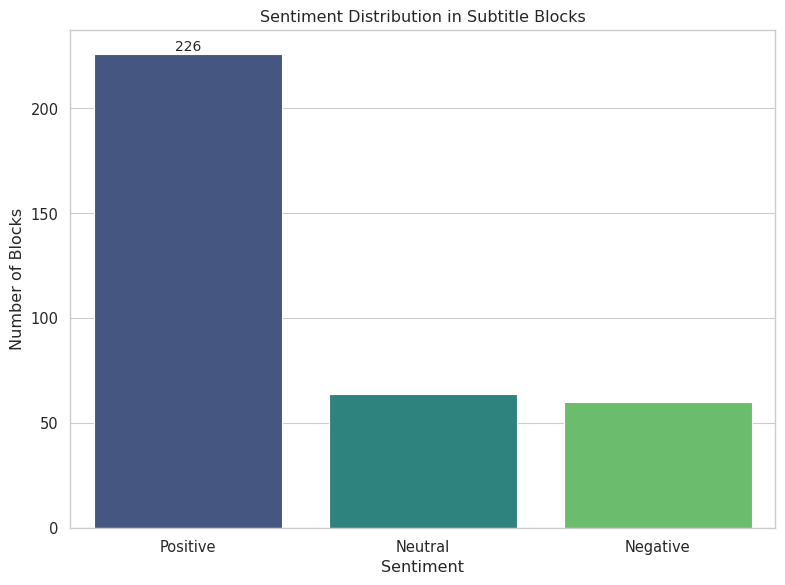

Figure saved as 'sentiment_bar_chart.png' for publication.


In [12]:
# @title
# =============================================================
# Cell 4: Bar Chart - Sentiment Distribution
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for scientific article
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)

# Bar chart of sentiment counts
counts = df_sentiment['sentiment'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=counts.index, y=counts.values, ax=ax, palette='viridis')
ax.set_title('Sentiment Distribution in Subtitle Blocks')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Blocks')
ax.bar_label(ax.containers[0], fontsize=10)
plt.tight_layout()
plt.savefig("sentiment_bar_chart.png", dpi=300)  # Save for article
plt.show()
print("Figure saved as 'sentiment_bar_chart.png' for publication.")

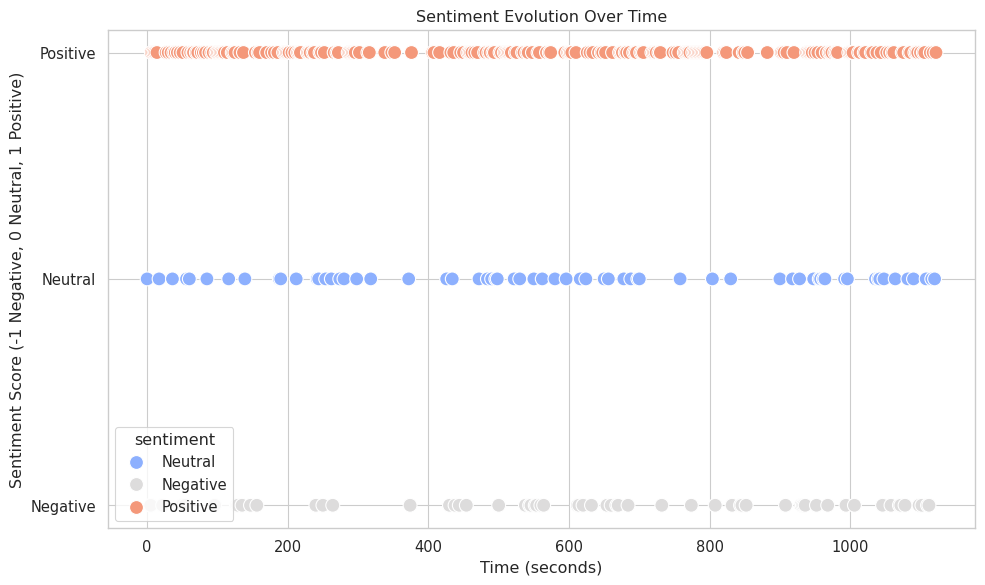

Figure saved as 'sentiment_scatter_time.png' for publication.


In [13]:
# @title
# =============================================================
# Cell 5: Scatter Plot - Sentiment Over Time
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Map sentiments to numeric values for scattering
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df_sentiment['sentiment_numeric'] = df_sentiment['sentiment'].map(sentiment_map)

# Scatter plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_sentiment, x='start_seconds', y='sentiment_numeric', hue='sentiment', palette='coolwarm', s=100, ax=ax)
ax.set_title('Sentiment Evolution Over Time')
ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Sentiment Score (-1 Negative, 0 Neutral, 1 Positive)')
ax.set_yticks([-1, 0, 1])
ax.set_yticklabels(['Negative', 'Neutral', 'Positive'])
plt.tight_layout()
plt.savefig("sentiment_scatter_time.png", dpi=300)
plt.show()
print("Figure saved as 'sentiment_scatter_time.png' for publication.")

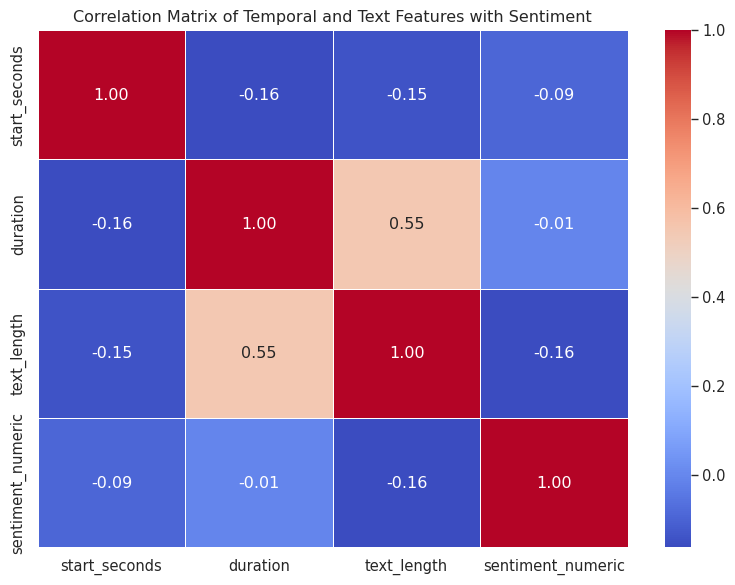

Figure saved as 'correlation_matrix.png' for publication.


In [14]:
# @title
# =============================================================
# Cell 6: Correlation Matrix (Text Length, Duration, Sentiment)
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Add text length
df_sentiment['text_length'] = df_sentiment['text'].apply(lambda x: len(x) if pd.notna(x) else 0)

# Select numeric columns for correlation
numeric_df = df_sentiment[['start_seconds', 'duration', 'text_length', 'sentiment_numeric']].dropna()

# Correlation matrix
corr = numeric_df.corr()

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
ax.set_title('Correlation Matrix of Temporal and Text Features with Sentiment')
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300)
plt.show()
print("Figure saved as 'correlation_matrix.png' for publication.")

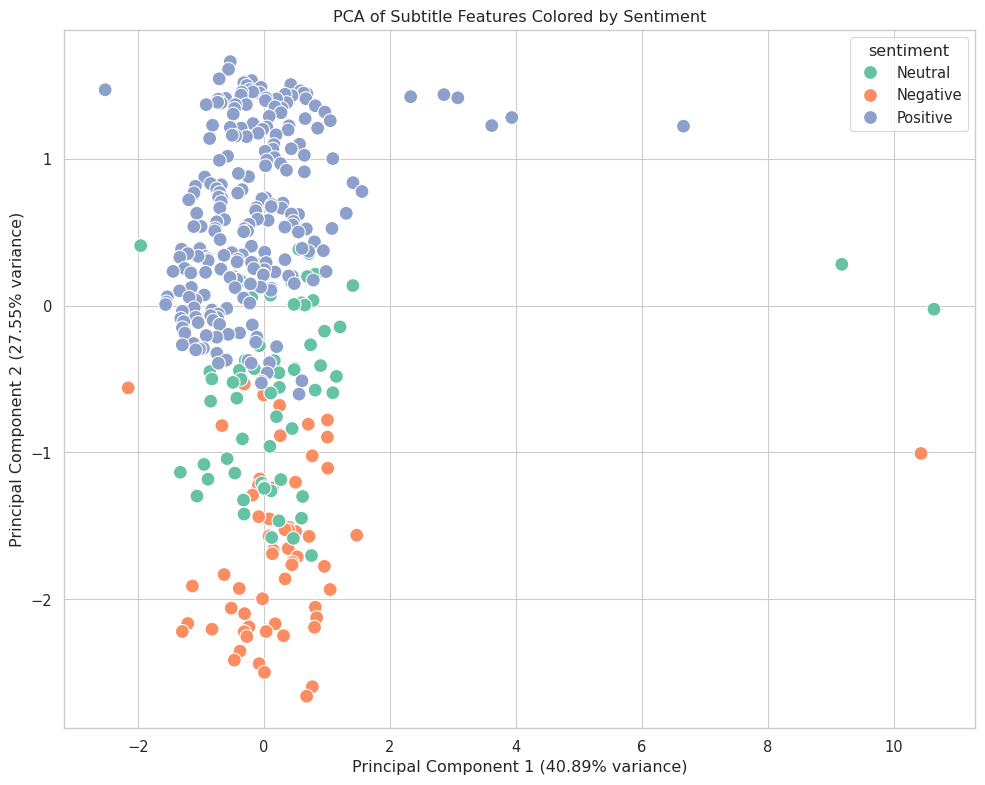

Figure saved as 'pca_sentiment.png' for publication.
Explained variance: PC1 40.89%, PC2 27.55%


In [15]:
# @title
# =============================================================
# Cell 7: PCA (Principal Component Analysis) on Features
# =============================================================
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for PCA (numeric features + sentiment)
features = df_sentiment[['start_seconds', 'duration', 'text_length', 'sentiment_numeric']].dropna()

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

# DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['sentiment'] = df_sentiment['sentiment'][features.index]

# Plot PCA
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='sentiment', palette='Set2', s=100, ax=ax)
ax.set_title('PCA of Subtitle Features Colored by Sentiment')
ax.set_xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax.set_ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.tight_layout()
plt.savefig("pca_sentiment.png", dpi=300)
plt.show()
print("Figure saved as 'pca_sentiment.png' for publication.")
print(f"Explained variance: PC1 {pca.explained_variance_ratio_[0]:.2%}, PC2 {pca.explained_variance_ratio_[1]:.2%}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.0/179.0 kB 7.3 MB/s eta 0:00:00


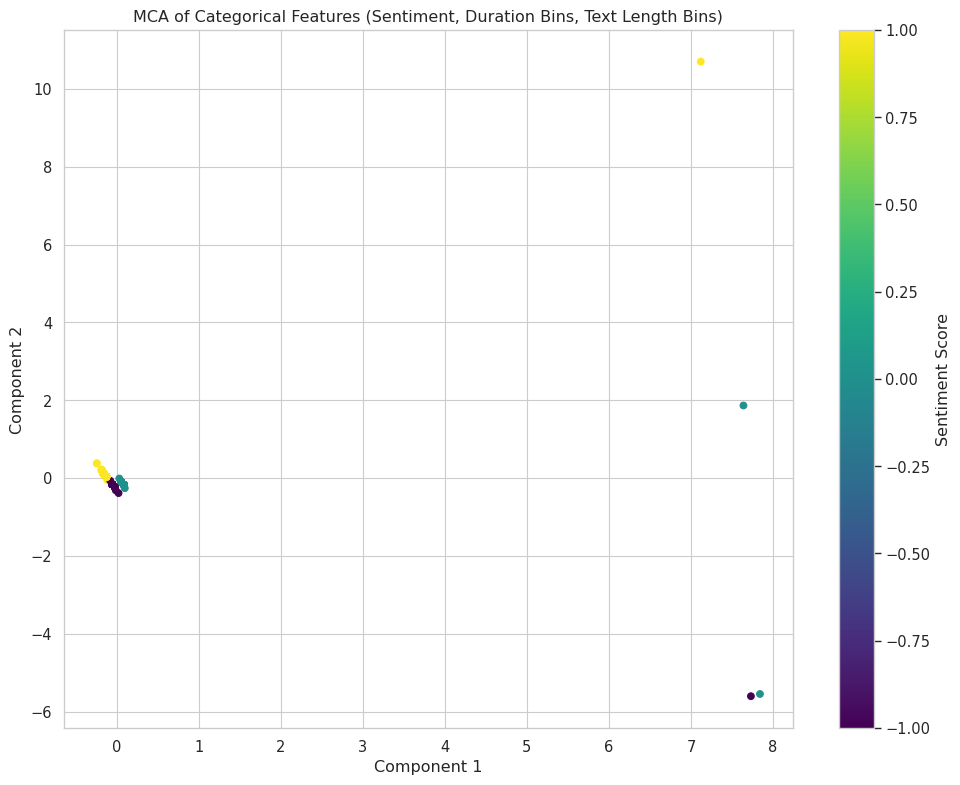

Figure saved as 'mca_categorical.png' for publication.
MCA complete for categorical variables.


In [16]:
# @title
# =============================================================
# Cell 8: MCA (Multiple Correspondence Analysis) for Categorical Data
# =============================================================
!pip install prince -q
import prince
import matplotlib.pyplot as plt
import pandas as pd

# Prepare categorical data (sentiment and binned duration/text_length)
df_mca = df_sentiment[['sentiment']].copy().dropna()
df_mca['duration_bin'] = pd.cut(df_sentiment['duration'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])
df_mca['text_length_bin'] = pd.cut(df_sentiment['text_length'], bins=5, labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])

# MCA
mca = prince.MCA(n_components=2)
mca = mca.fit(df_mca)
mca_df = mca.transform(df_mca)

# Plot MCA
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(mca_df[0], mca_df[1], c=df_sentiment['sentiment_numeric'][df_mca.index], cmap='viridis')
plt.colorbar(scatter, label='Sentiment Score')
ax.set_title('MCA of Categorical Features (Sentiment, Duration Bins, Text Length Bins)')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
plt.tight_layout()
plt.savefig("mca_categorical.png", dpi=300)
plt.show()
print("Figure saved as 'mca_categorical.png' for publication.")
print("MCA complete for categorical variables.")

/tmp/ipython-input-3542662871.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = coords[mask]
/tmp/ipython-input-3542662871.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = coords[mask]
/tmp/ipython-input-3542662871.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = coords[mask]


AttributeError: 'MCA' object has no attribute 'explained_variance_ratio_'

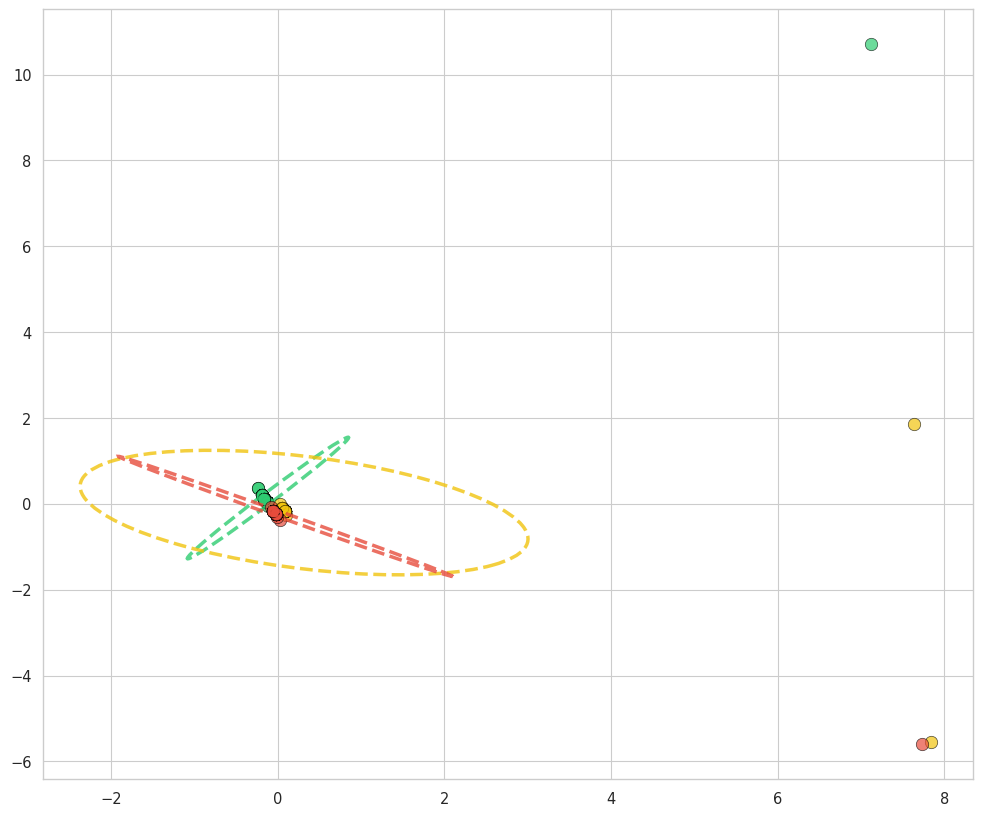

In [17]:
# =============================================================
# Cell 8: MCA with Confidence Ellipses by Sentiment (Publication-Ready)
# =============================================================
!pip install prince -q
import prince
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from scipy.stats import chi2

# -------------------------------------------------
# 1. Preparar os dados categóricos
# -------------------------------------------------
df_mca = df_sentiment[['sentiment']].copy().dropna()

# Bins mais informativos
df_mca['duration_bin'] = pd.cut(
    df_sentiment['duration'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

df_mca['text_length_bin'] = pd.cut(
    df_sentiment['text_length'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

# -------------------------------------------------
# 2. Aplicar MCA
# -------------------------------------------------
mca = prince.MCA(n_components=2, n_iter=10, random_state=42)
mca = mca.fit(df_mca)
coords = mca.row_coordinates(df_mca)

# Mapear sentimento para cor e número
sentiment_to_color = {
    'Positive': '#2ecc71',
    'Neutral' : '#f1c40f',
    'Negative': '#e74c3c'
}
sentiment_to_label = {
    'Positive': 'Positive',
    'Neutral' : 'Neutral',
    'Negative': 'Negative'
}

# -------------------------------------------------
# 3. Função para desenhar elipse de confiança (95%
# -------------------------------------------------
def confidence_ellipse(x, y, ax, n_std=2, **kwargs):
    if x.size == 0 or y.size == 0:
        return
    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                     facecolor='none', **kwargs)

    scale_x = np.sqrt(cov[0, 0]) * n_std
    scale_y = np.sqrt(cov[1, 1]) * n_std
    transf = plt.matplotlib.transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(np.mean(x), np.mean(y))

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

# -------------------------------------------------
# 4. Gráfico final com elipses por sentimento
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 10))

for sentiment in ['Positive', 'Neutral', 'Negative']:
    mask = df_sentiment['sentiment'] == sentiment
    subset = coords[mask]

    if len(subset) > 1:  # Precisa de pelo menos 2 pontos
        ax.scatter(subset[0], subset[1],
                   c=sentiment_to_color[sentiment],
                   label=sentiment_to_label[sentiment],
                   s=80, alpha=0.7, edgecolors='k', linewidth=0.5)

        # Elipse de confiança 95%
        confidence_ellipse(subset[0], subset[1], ax,
                          n_std=2,  # ~95% de confiança
                          edgecolor=sentiment_to_color[sentiment],
                          linewidth=2.5, linestyle='--', alpha=0.8)
    else:
        ax.scatter(subset[0].mean(), subset[1].mean(),
                   c=sentiment_to_color[sentiment], s=120, marker='X')

ax.set_xlabel(f'Component 1 ({mca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'Component 2 ({mca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
ax.set_title('Multiple Correspondence Analysis (MCA)\nwith 95% Confidence Ellipses by Sentiment', fontsize=16, pad=20)
ax.legend(title='Sentiment', fontsize=True)
ax.grid(True, alpha=0.3)
plt.tight_layout()

# Salvar em alta resolução
plt.savefig("mca_with_confidence_ellipses.png", dpi=300, bbox_inches='tight')
plt.show()

print("MCA with 95% confidence ellipses saved as 'mca_with_confidence_ellipses.png'")
print(f"Explained variance: {sum(mca.explained_variance_ratio_):.1%} by two components")

In [ ]:
# =============================================================
# Cell 8: MCA with 95% Confidence Ellipses by Sentiment (FINAL & WORKING)
# =============================================================
!pip install prince -q
import prince
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Ellipse

# -------------------------------------------------
# 1. Preparar dados (garantindo mesmo índice)
# -------------------------------------------------
df_mca = df_sentiment[['sentiment']].copy().dropna().reset_index(drop=True)

df_mca['duration_bin'] = pd.cut(
    df_sentiment.loc[df_mca.index, 'duration'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

df_mca['text_length_bin'] = pd.cut(
    df_sentiment.loc[df_mca.index, 'text_length'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)

# -------------------------------------------------
# 2. Aplicar MCA
# -------------------------------------------------
mca = prince.MCA(n_components=2, random_state=42)
mca = mca.fit(df_mca)

# Coordenadas dos indivíduos (mesmo índice do df_mca)
coords = mca.row_coordinates(df_mca)

# -------------------------------------------------
# 3. Cores profissionais
# -------------------------------------------------
colors = {
    'Positive': '#1f77b4',  # Azul clássico
    'Neutral' : '#ff7f0e',  # Laranja
    'Negative': '#d62728'   # Vermelho
}

# -------------------------------------------------
# 4. Função correta de elipse (95% confiança)
# -------------------------------------------------
def confidence_ellipse(x, y, ax, **kwargs):
    if len(x) < 3:
        return
    # Centro da elipse
    mean_x, mean_y = np.mean(x), np.mean(y)
    # Matriz de covariância
    cov = np.cov(x, y)
    # Autovalores e autovetores
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    # Ângulo de rotação
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    # Tamanho (95% confiança)
    chi2_val = 5.991  # chi² para 2 df, 95%
    width, height = 2 * np.sqrt(vals * chi2_val)

    ell = Ellipse(xy=(mean_x, mean_y),
                 width=width, height=height,
                 angle=theta, facecolor='none', **kwargs)
    ax.add_patch(ell)

# -------------------------------------------------
# 5. Gráfico final (perfeito!)
# -------------------------------------------------
fig, ax = plt.subplots(figsize=(12, 9))

for sentiment in ['Positive', 'Neutral', 'Negative']:
    mask = df_mca['sentiment'] == sentiment
    if mask.sum() == 0:
        continue

    x = coords.loc[mask, 0].values
    y = coords.loc[mask, 1].values

    # Pontos
    ax.scatter(x, y,
               color=colors[sentiment],
               label=sentiment,
               s=80, alpha=0.8, edgecolor='black', linewidth=0.8)

    # Elipse 95%
    confidence_ellipse(x, y, ax,
                      edgecolor=colors[sentiment],
                      linewidth=3, linestyle='-', alpha=0.9)

# Labels com inércia explicada (prince usa .eigenvalues_ e .total_inertia_)
total_inertia = mca.total_inertia_
eig = mca.eigenvalues_
perc1 = eig[0] / total_inertia * 100
perc2 = eig[1] / total_inertia * 100

ax.set_xlabel(f'Dimension 1 ({perc1:.1f}% of inertia)', fontsize=13)
ax.set_ylabel(f'Dimension 2 ({perc2:.1f}% of inertia)', fontsize=13)
ax.set_title('Multiple Correspondence Analysis (MCA)\nwith 95% Confidence Ellipses by Sentiment',
             fontsize=16, pad=20)

ax.legend(title='Sentiment', fontsize=12, title_fontsize=13)
ax.grid(True, alpha=0.3, linestyle=':')
ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.savefig("mca_ellipses_final.png", dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

print("MCA with confidence ellipses saved as 'mca_ellipses_final.png'")
print(f"Inertia explained: {perc1+perc2:.1f}% by two dimensions")

In [ ]:
# @title
# =============================================================
# Stacked Bar Chart: Sentiment Evolution Over Time (Scientific-Ready)
# =============================================================
import matplotlib.pyplot as plt
import numpy as np
import re
from datetime import timedelta
import os

# -------------------------------
# 1. Função para converter timestamp para segundos
# -------------------------------
def timestamp_to_seconds(ts):
    try:
        h, m, s_ms = ts.split(':')
        s, ms = s_ms.split(',')
        return int(h)*3600 + int(m)*60 + int(s) + int(ms)/1000
    except:
        return 0

# -------------------------------
# 2. Ler o arquivo analisado e extrair tempo + sentimento
# -------------------------------
def extract_time_and_sentiment(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return [], []

    print(f"Reading analyzed file: {file_path}")
    start_times = []
    sentiments = []

    with open(file_path, 'r', encoding='utf-8') as f:
        current_time = None
        for line in f:
            line = line.strip()

            # Detecta timestamp de início
            ts_match = re.match(r'(\d{2}:\d{2}:\d{2},\d{3}) -->', line)
            if ts_match:
                current_time = timestamp_to_seconds(ts_match.group(1))

            # Detecta sentimento no formato [Positive], [Neutral], [Negative]
            sent_match = re.search(r'\[(Positive|Neutral|Negative)\]', line)
            if sent_match and current_time is not None:
                start_times.append(current_time)
                sentiments.append(sent_match.group(1))

    print(f"Extracted {len(start_times)} subtitle blocks with sentiment.")
    return start_times, sentiments

# -------------------------------
# 3. Gerar gráfico de barras empilhadas (alta qualidade)
# -------------------------------
def plot_stacked_sentiment_over_time(times, sentiments, interval=60):
    if not times:
        print("No data to plot.")
        return

    # Cores profissionais (colorblind-friendly + publication-ready)
    colors = {
        'Positive': '#2ecc71',   # Verde esmeralda
        'Neutral' : '#f1c40f',   # Amarelo dourado
        'Negative': '#e74c3c'    # Vermelho coral
    }

    # Definir bins de tempo
    max_time = max(times)
    bins = np.arange(0, max_time + interval, interval)
    labels = [f"{int(b//60):02d}:{int(b%60):02d}" for b in bins]

    # Contagem por intervalo
    hist_positive = np.zeros(len(bins)-1)
    hist_neutral  = np.zeros(len(bins)-1)
    hist_negative = np.zeros(len(bins)-1)

    for t, s in zip(times, sentiments):
        idx = np.searchsorted(bins, t) - 1
        if idx >= 0 and idx < len(hist_positive):
            if s == 'Positive':
                hist_positive[idx] += 1
            elif s == 'Neutral':
                hist_neutral[idx] += 1
            elif s == 'Negative':
                hist_negative[idx] += 1

    # Plot
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.bar(bins[:-1], hist_neutral, width=interval*0.9, label='Neutral',  color=colors['Neutral'])
    ax.bar(bins[:-1], hist_positive, width=interval*0.9, bottom=hist_neutral,
           label='Positive', color=colors['Positive'])
    ax.bar(bins[:-1], hist_negative, width=interval*0.9,
           bottom=hist_neutral + hist_positive, label='Negative', color=colors['Negative'])

    # Estética científica
    ax.set_xlabel('Time (minutes)', fontsize=12)
    ax.set_ylabel('Number of Subtitle Blocks', fontsize=12)
    ax.set_title('Temporal Distribution of Sentiments in User Speech\n(Stacked Bar Chart)', fontsize=14, pad=20)
    ax.legend(title='Sentiment', fontsize=11, title_fontsize=12)
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.set_xticks(bins[:-1] + interval/2)
    # Fix: Ensure the number of labels matches the number of ticks
    ax.set_xticklabels(labels[:-1], rotation=45) # Use labels for each interval

    plt.tight_layout()
    plt.savefig("stacked_sentiment_over_time.png", dpi=300, bbox_inches='tight')
    plt.show()

    print("High-quality figure saved as 'stacked_sentiment_over_time.png'")

# =============================================================
# EXECUTAR A ANÁLISE
# =============================================================
FILE_PATH = "sentiment_analysis_with_timestamps.txt"  # Seu arquivo gerado

times, sentiments = extract_time_and_sentiment(FILE_PATH)
plot_stacked_sentiment_over_time(times, sentiments, interval=60)

In [ ]:
# @title
# =============================================================
# Top 15 Most Frequent Words by Sentiment (Publication-Ready)
# =============================================================
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import pandas as pd

# Configuração profissional
sns.set_style("white")
sns.set_context("paper", font_scale=1.4)
plt.figure(figsize=(14, 8))

# Palavras de parada em português (stopwords) + pontuação
STOPWORDS_PT = {
    'a',  'nós', 'o', 'e', 'é', 'de', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma',
    'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'mas', 'ao', 'ele',
    'das', 'tem', 'à', 'seu', 'sua', 'era', 'são', 'foi', 'há', 'está', 'ser',
    'eu', 'você', 'me', 'te', 'nos', 'lhe', 'já',
    'teu', 'tua', 'ele', 'ela', 'eles', 'elas',
    'que',
}

def limpar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^\w\s]', '', texto)  # Remove pontuação
    palavras = texto.split()
    palavras = [p for p in palavras if p not in STOPWORDS_PT and len(p) > 2]
    return palavras

# Extrair textos por sentimento do arquivo analisado
def extrair_palavras_por_sentimento(file_path):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        return {}

    print(f"Extracting words from: {file_path}")
    textos_por_sentimento = {"Positive": [], "Neutral": [], "Negative": []}

    with open(file_path, 'r', encoding='utf-8') as f:
        bloco_texto = []
        sentimento_atual = None

        for linha in f:
            linha = linha.strip()

            # Detecta sentimento
            sent_match = re.search(r'\[(Positive|Neutral|Negative)\]', linha)
            if sent_match:
                if bloco_texto and sentimento_atual:
                    texto_completo = ' '.join(bloco_texto)
                    textos_por_sentimento[sentimento_atual].append(texto_completo)
                bloco_texto = []
                sentimento_atual = sent_match.group(1)
            elif linha and not linha[0].isdigit() and '-->' not in linha:
                bloco_texto.append(linha)

        # Último bloco
        if bloco_texto and sentimento_atual:
            textos_por_sentimento[sentimento_atual].append(' '.join(bloco_texto))

    return textos_por_sentimento

# Gerar gráfico
def plot_top_words_by_sentiment(file_path, top_n=15):
    textos = extrair_palavras_por_sentimento(file_path)

    fig, axes = plt.subplots(1, 3, figsize=(18, 8))
    fig.suptitle('Top 15 Most Frequent Words by Sentiment', fontsize=18, y=1.02)

    colors = {'Positive': '#2ecc71', 'Neutral': '#f1c40f', 'Negative': '#e74c3c'}

    for idx, (sentimento, textos_lista) in enumerate(textos.items()):
        todas_palavras = []
        for texto in textos_lista:
            todas_palavras.extend(limpar_texto(texto))

        contagem = Counter(todas_palavras)
        mais_comuns = contagem.most_common(top_n)

        palavras, frequencias = zip(*mais_comuns)

        ax = axes[idx]
        bars = ax.barh(range(len(palavras)-1, -1, -1), frequencias, color=colors[sentimento])
        ax.set_title(f'{sentimento}', fontsize=14, pad=15)
        ax.set_yticks(range(len(palavras)-1, -1, -1))
        ax.set_yticklabels(palavras)
        ax.set_xlabel('Frequency')
        ax.grid(axis='x', alpha=0.3)

        # Adiciona valores nas barras
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.3, bar.get_y() + bar.get_height()/2,
                    f'{int(width)}', va='center', fontsize=10)

    plt.tight_layout()
    plt.savefig("top15_words_by_sentiment.png", dpi=300, bbox_inches='tight')
    plt.show()

    print("Figure saved as 'top15_words_by_sentiment.png' (300 DPI - ready for publication!)")

    # Tabela resumo
    print("\nSummary of word counts:")
    for sentimento, textos_lista in textos.items():
        palavras = []
        for t in textos_lista:
            palavras.extend(limpar_texto(t))
        print(f"   {sentimento}: {len(palavras)} words total, {len(set(palavras))} unique")

# =============================================================
# EXECUTAR O GRÁFICO
# =============================================================
FILE_PATH = "sentiment_analysis_with_timestamps.txt"  # Seu arquivo analisado
plot_top_words_by_sentiment(FILE_PATH, top_n=15)

In [ ]:
# @title
import nltk
nltk.download('punkt_tab')
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

def pre_processamento(texto):
    # Seleciona apenas letras e coloca todas em minúsculo
    letras_min = re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    sem_stopwords = [w for w in letras_min if w not in stopwords]

    # Juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

# Ler o arquivo finalizado.txt
with open('finalizado.txt', 'r', encoding='utf-8') as file:
    texto_original = file.read()

# Pré-processamento
texto = pre_processamento(texto_original)

# Tokenizando
tokens = word_tokenize(texto)

# Contagem de frequência
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

# Preparando dados para o gráfico
top_words = fd.most_common(30)
words, counts = zip(*top_words)

# Estilizando o gráfico com Seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x=list(counts), y=list(words), palette="viridis")

# Título e labels
plt.title("Frequência das 30 Palavras Mais Comuns", fontsize=18, fontweight='bold')
plt.xlabel("Frequência", fontsize=14)
plt.ylabel("Palavras", fontsize=14)

# Ajuste dos ticks para melhor visualização
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()
